## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import torch
import time
import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})
import pickle 
import sys
parent_directory = os.path.abspath('..')
sys.path.append(parent_directory)
from matplotlib.lines import Line2D


In [3]:
from BufferStockModel import BufferStockModelClass
from BufferStockModelEGM import BufferStockModelEGMClass
from EconDLSolvers import choose_gpu
from plot_funcs import load_all, train_specs, compute_transfer, transfer_plot, convergence_plot

## 2. <a id='toc1_'></a>[Load models](#toc0_)

In [4]:
folder_load = '.'
folder = '.'
# algonames = ['DeepSimulate','SimEGMQD','SimEGMMC'] 
algonames = ['DeepSimulate','SimEGM'] 

In [5]:
algolabels = {
    'DeepSimulate':'DeepSimulate',
    'SimEGM':'DeepSimEGM',
    # 'SimEGMMC':'SimEGM - Monte Carlo',
}

In [6]:
models = load_all(folder_load,'GUV')

DP base
DP reg
DeepSimulate base
DeepSimulate reg
SimEGM base
SimEGM reg


In [7]:
age_range = np.arange(25,85)

## 3. <a id='toc1_'></a>[Performance](#toc0_)

In [8]:
print(models[('DP','reg')].sim.R, "DP")
print(models[('SimEGM','reg')].sim.R, "SimEGM")
print(models[('DeepSimulate','reg')].sim.R, "DeepSimulate")

-1.5995668741832088 DP
-1.5995752 SimEGM
-1.5995532 DeepSimulate


In [9]:
print(models[('DP','base')].sim.R, "DP")
print(models[('SimEGM','base')].sim.R, "SimEGM")
print(models[('DeepSimulate','base')].sim.R, "DeepSimulate")

-1.622041379924476 DP
-1.622169 SimEGM
-1.6221501 DeepSimulate


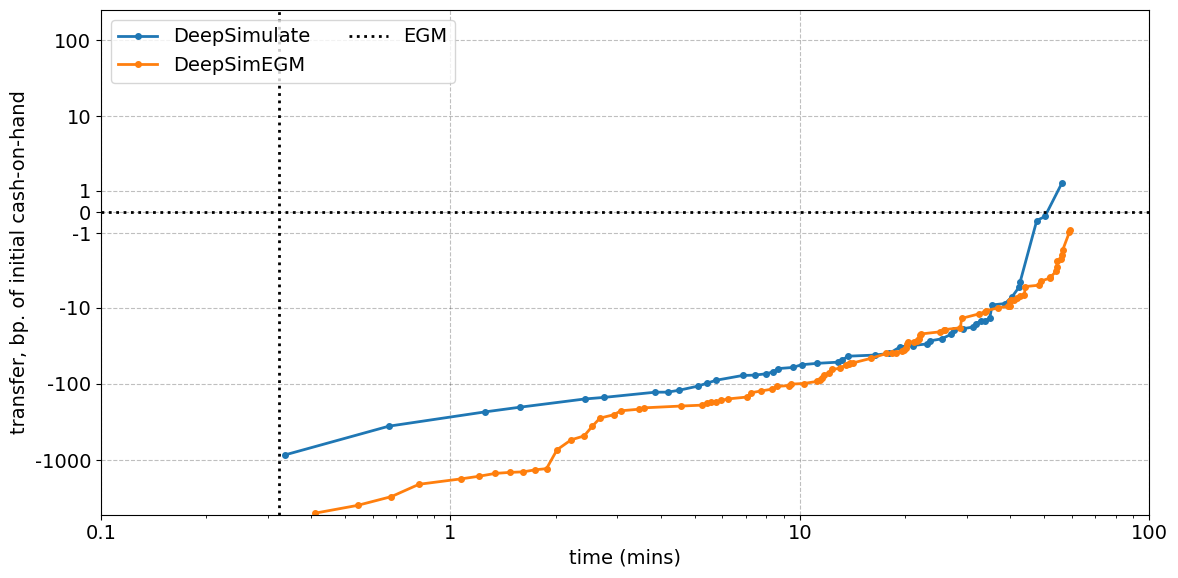

In [10]:
xlim = [0.1,100]
xlim_low = [0.001,100]
# ylim = [-1000,10]

    
DP = models[('DP','reg')]
specs = {(algoname,'reg'):algolabels[algoname] for algoname in algonames}

convergence_plot('GUV_reg',models,specs,DP=DP,do_transfer=True,
                    # xlim=xlim_low,ylim=ylim,
                    xlim=xlim,
                    folder=folder)

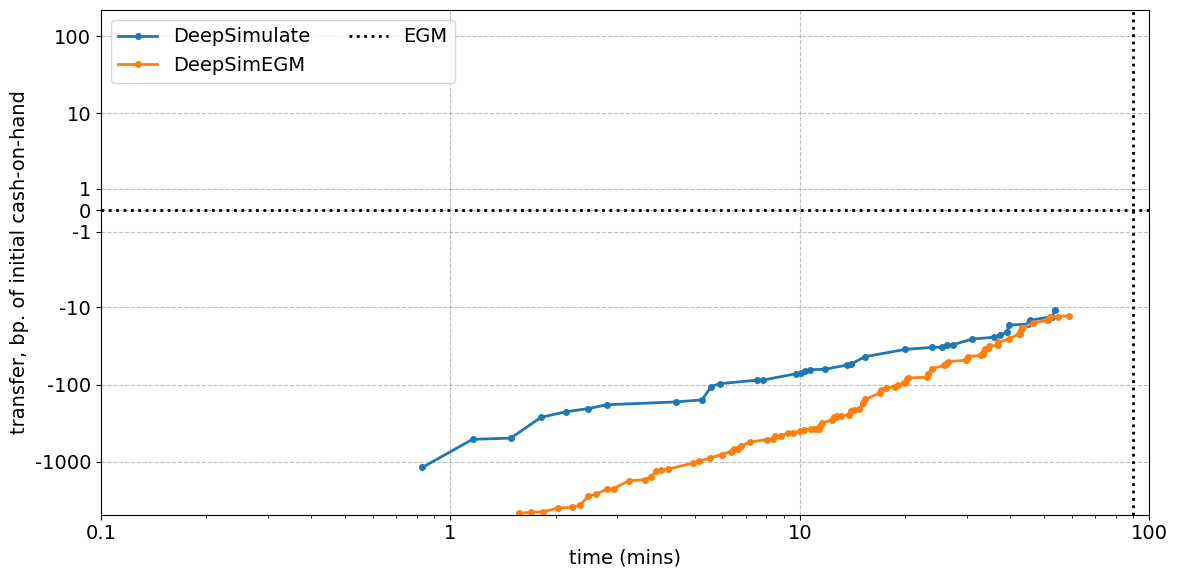

In [11]:
xlim = [0.1,100]
xlim_low = [0.001,100]
# ylim = [-1000,10]

    
DP = models[('DP','base')]
specs = {(algoname,'base'):algolabels[algoname] for algoname in algonames}

convergence_plot('GUV',models,specs,DP=DP,do_transfer=True,
                    # xlim=xlim_low,ylim=ylim,
                    xlim=xlim,
                    folder=folder)

In [ ]:
print(f'DP solution in approximate model took {models[('DP','reg')].info['time']/60} minutes ')

0.3242518700038393 DP


In [ ]:
print(f'DP solution in baseline model took {models[('DP','base')].info['time']/60} minutes ')

89.71115641833748 DP


## 4. <a id='toc1_'></a>[Comparing approximate and baseline DP](#toc0_)

DP
DP


C:\Users\jzd145\AppData\Local\Temp\ipykernel_22084\2308508565.py:87: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


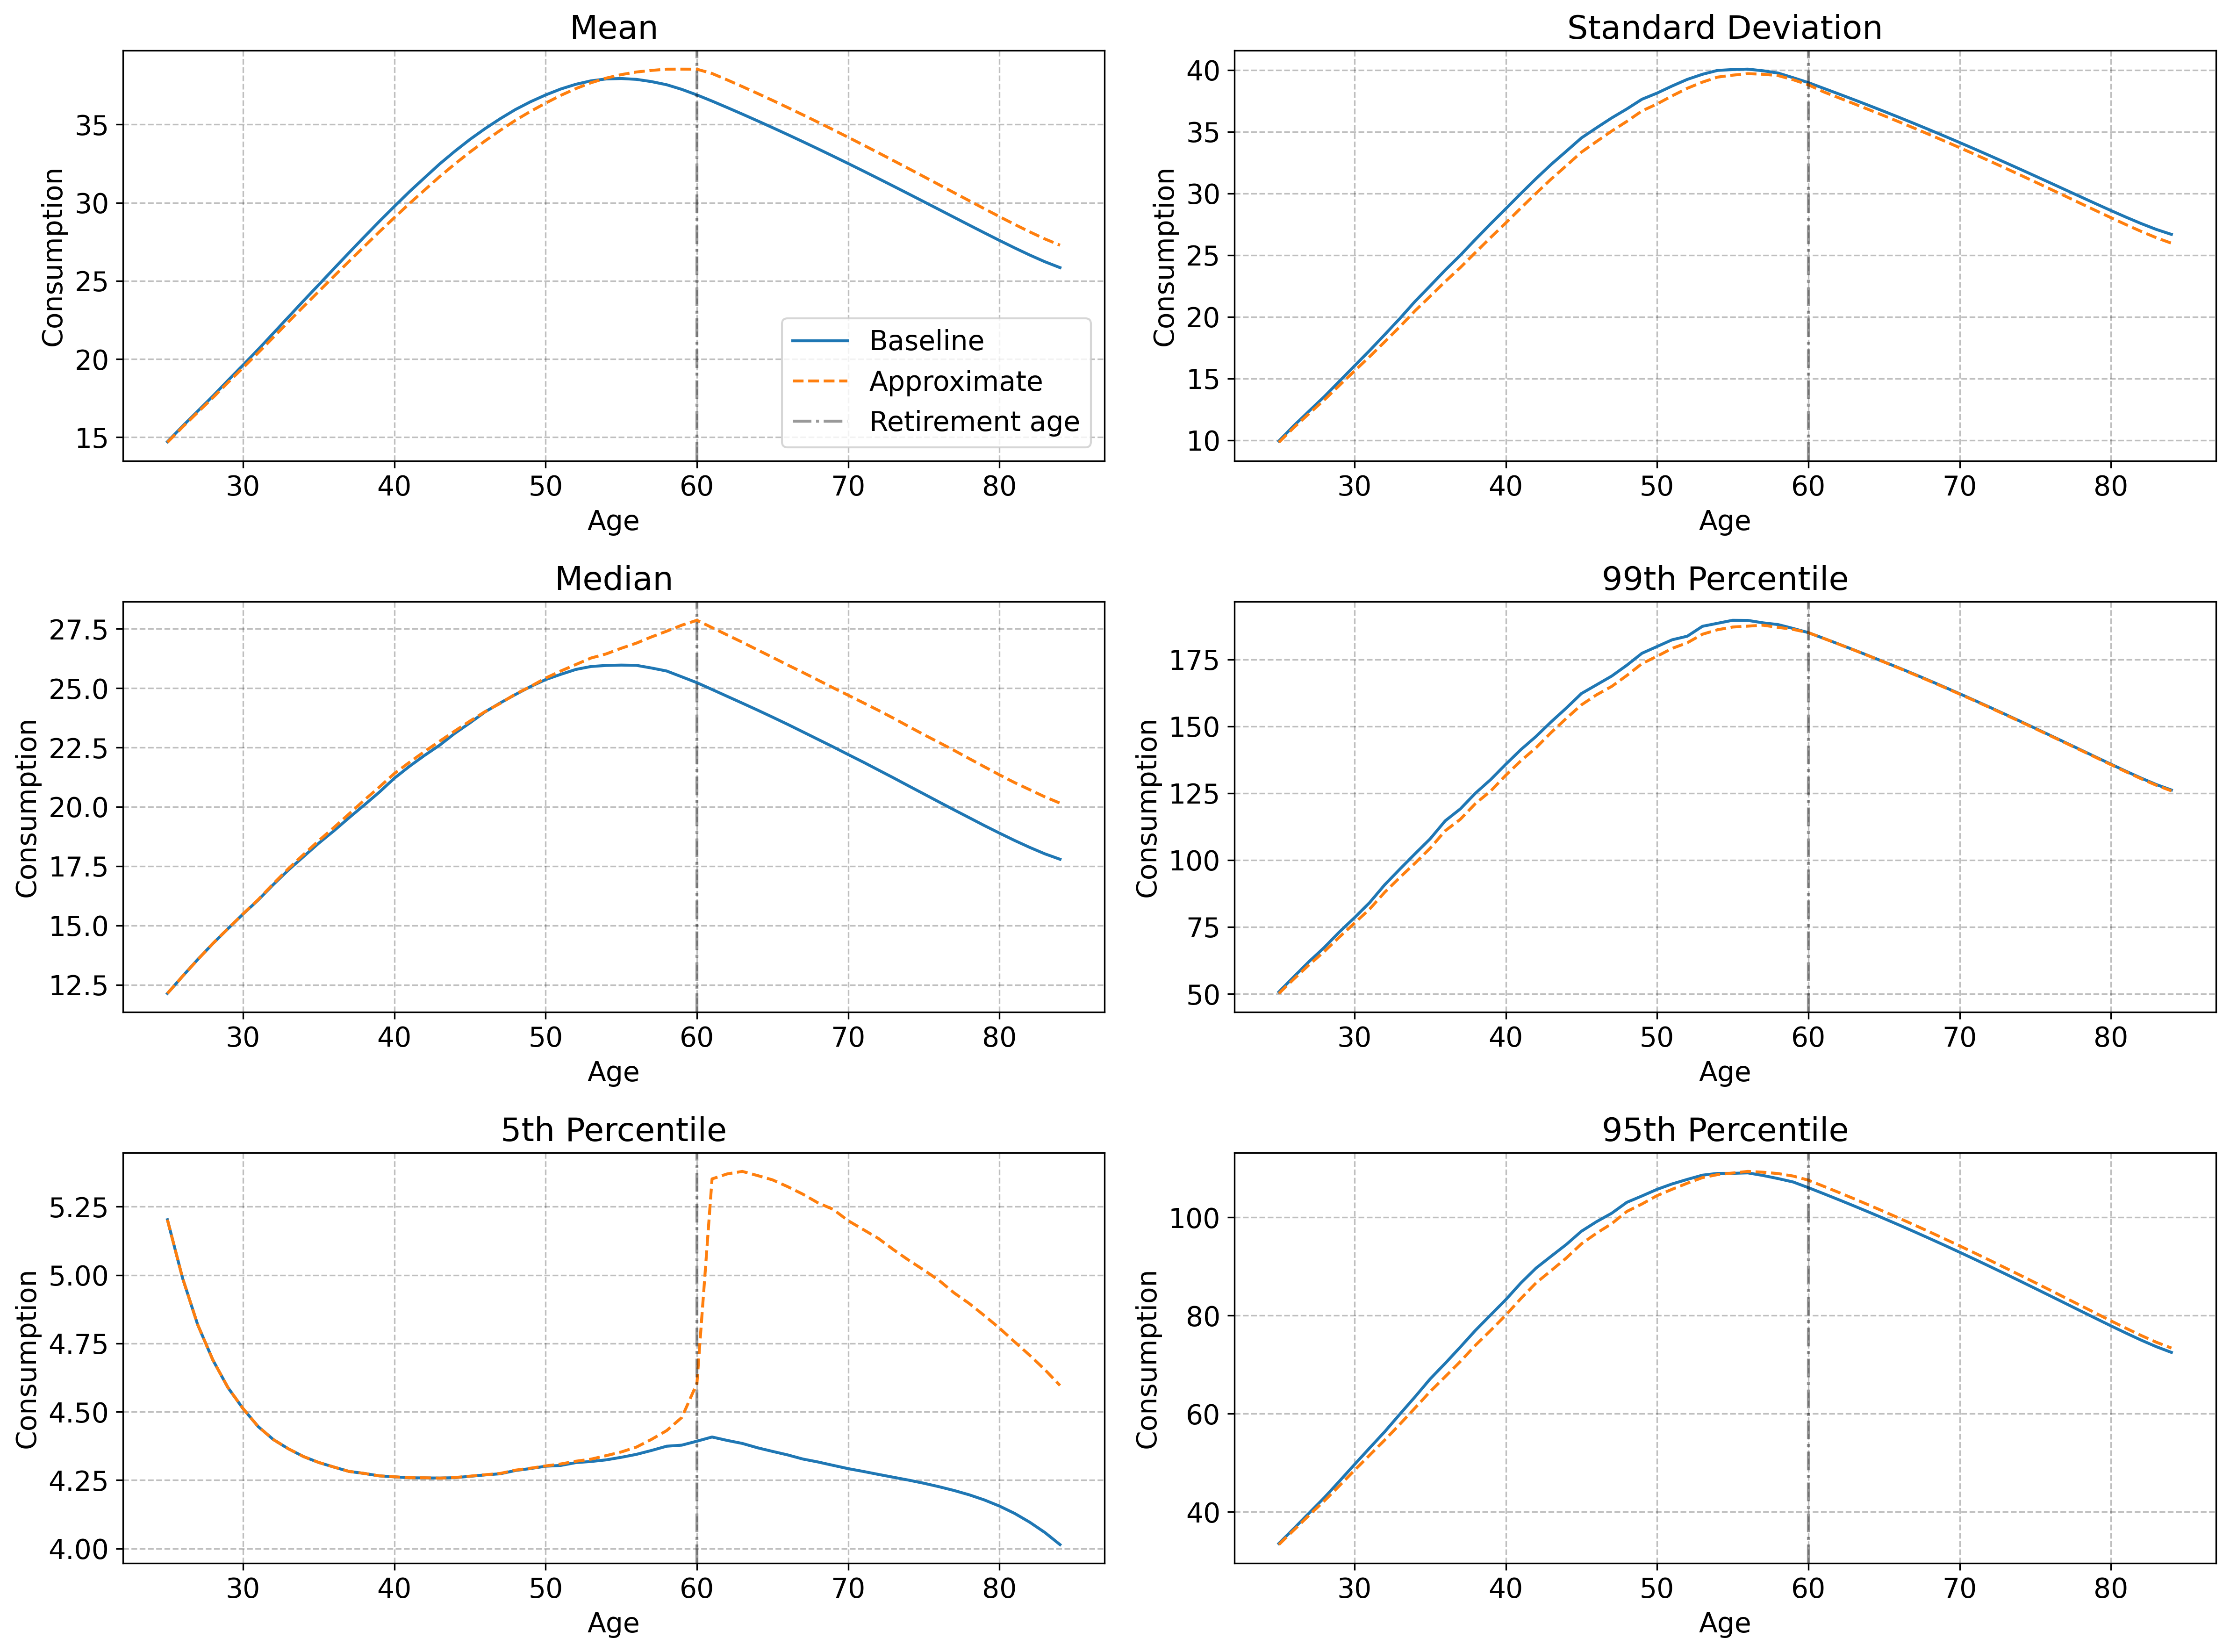

In [ ]:
# plot wide format
fig, ax = plt.subplots(3,2,figsize=(16,12),dpi=300)

model_labels = ['Baseline','Approximate']
line_type = ['-','--']
algonames_added = algonames + ['DP']


for i_model, model_name in enumerate(['base','reg']):
    # for i, algoname in enumerate(algonames):

    model = models[('DP', model_name)]
    algoname = 'DP'
    label = 'DP' + ' ' + model_labels[i_model]

    print(algoname)

    if i_model == 0:
        model_label = 'Baseline'
    else:
        model_label = 'Approximate'

    ax[0,0].plot(age_range, np.mean(model.sim.outcomes[...,0], axis=1), color=colors[i_model], linestyle=line_type[i_model],label = f'{model_label}')
    
    ax[0,1].plot(age_range, np.std(model.sim.outcomes[...,0], axis=1),  color=colors[i_model], linestyle=line_type[i_model])
    ax[1,0].plot(age_range, np.percentile(model.sim.outcomes[...,0],q=50, axis=1),  color=colors[i_model], linestyle=line_type[i_model])
    ax[1,1].plot(age_range, np.percentile(model.sim.outcomes[...,0],q = 99, axis=1),  color=colors[i_model], linestyle=line_type[i_model])
    ax[2,0].plot(age_range, np.percentile(model.sim.outcomes[...,0],q=5, axis=1),  color=colors[i_model], linestyle=line_type[i_model])
    ax[2,1].plot(age_range, np.percentile(model.sim.outcomes[...,0],q = 95, axis=1),  color=colors[i_model], linestyle=line_type[i_model])

    # ax[3].plot(np.percentile(model.sim.outcomes[...,0],q = 99, axis=1), label =label, color=colors[i], linestyle=line_type[i_model])


ax[0,0].axvline(model.par.T_retired+25, color='black', linestyle='-.', alpha=0.4, label = 'Retirement age')
ax[0,1].axvline(model.par.T_retired+25, color='black', linestyle='-.', alpha=0.4)
ax[1,0].axvline(model.par.T_retired+25, color='black', linestyle='-.', alpha=0.4)
ax[1,1].axvline(model.par.T_retired+25, color='black', linestyle='-.', alpha=0.4)
ax[2,0].axvline(model.par.T_retired+25, color='black', linestyle='-.', alpha=0.4)
ax[2,1].axvline(model.par.T_retired+25, color='black', linestyle='-.', alpha=0.4)

ax[0,0].set_xlabel('Age')
ax[0,0].set_ylabel('Consumption')
ax[0,0].set_title('Mean')
ax[0,0].legend()
ax[0,1].set_title('Standard Deviation')
ax[0,1].set_xlabel('Age')
ax[0,1].set_ylabel('Consumption')

ax[1,0].set_title('Median')
ax[1,0].set_xlabel('Age')
ax[1,0].set_ylabel('Consumption')
ax[1,1].set_title('99th Percentile')
ax[1,1].set_xlabel('Age')
ax[1,1].set_ylabel('Consumption')


ax[2,0].set_title('5th Percentile')
ax[2,0].set_xlabel('Age')
ax[2,0].set_ylabel('Consumption')
ax[2,1].set_title('95th Percentile')
ax[2,1].set_xlabel('Age')
ax[2,1].set_ylabel('Consumption')
ax[0,0].legend( loc='best')

fig.tight_layout()

fig.show()
fig.savefig(os.path.join(folder,"c_across_compare" + '.pdf'), bbox_inches='tight')

DP
DP


C:\Users\jzd145\AppData\Local\Temp\ipykernel_22084\1704602831.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


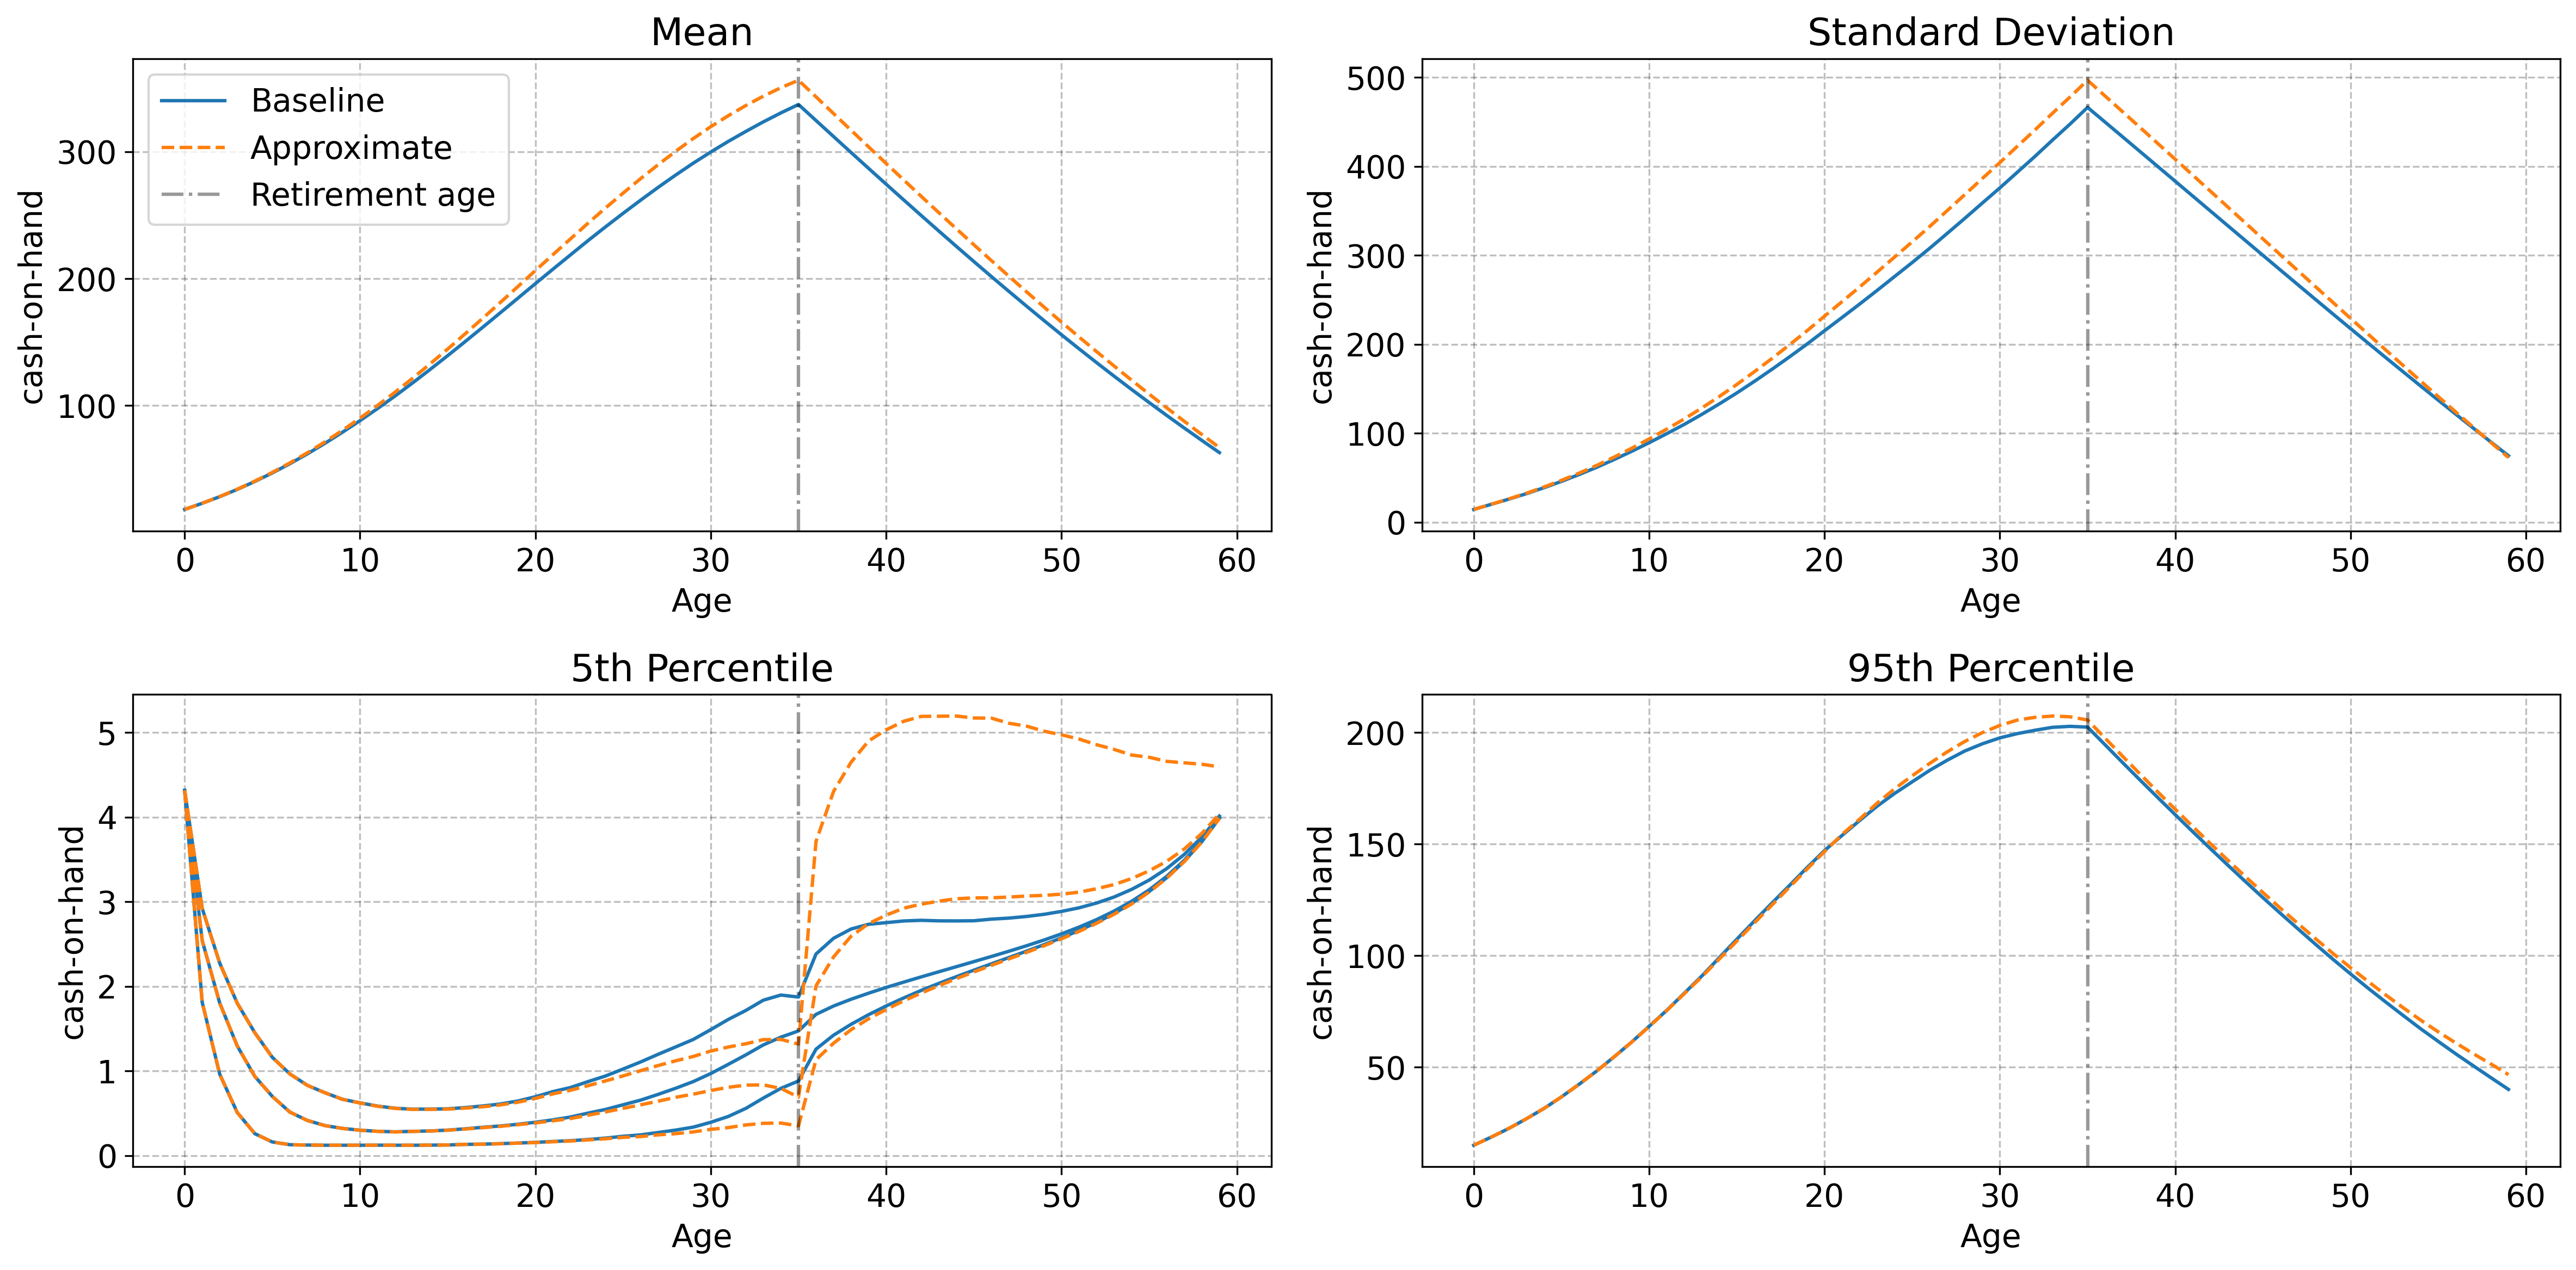

In [ ]:
# plot wide format
fig, ax = plt.subplots(2,2,figsize=(16,8),dpi=300)

model_labels = ['Baseline','Approximate']
line_type = ['-','--']
algonames_added = algonames + ['DP']


for i_model, model_name in enumerate(['base','reg']):
    # for i, algoname in enumerate(algonames):

    model = models[('DP', model_name)]
    algoname = 'DP'
    label = 'DP' + ' ' + model_labels[i_model]

    print(algoname)

    if i_model == 0:
        model_label = 'Baseline'
    else:
        model_label = 'Approximate'

    ax[0,0].plot(np.mean(model.sim.states[...,0], axis=1), color=colors[i_model], linestyle=line_type[i_model],label = f'{model_label}')
    ax[0,1].plot(np.std(model.sim.states[...,0], axis=1),  color=colors[i_model], linestyle=line_type[i_model])
    ax[1,0].plot(np.percentile(model.sim.states[...,0],q=5, axis=1),  color=colors[i_model], linestyle=line_type[i_model])
    ax[1,0].plot(np.percentile(model.sim.states[...,0],q=3, axis=1),  color=colors[i_model], linestyle=line_type[i_model])
    ax[1,0].plot(np.percentile(model.sim.states[...,0],q=1, axis=1),  color=colors[i_model], linestyle=line_type[i_model])    
    ax[1,1].plot(np.percentile(model.sim.states[...,0],q = 50, axis=1),  color=colors[i_model], linestyle=line_type[i_model])


ax[0,0].axvline(model.par.T_retired, color='black', linestyle='-.', alpha=0.4, label = 'Retirement age')
ax[0,1].axvline(model.par.T_retired, color='black', linestyle='-.', alpha=0.4)
ax[1,0].axvline(model.par.T_retired, color='black', linestyle='-.', alpha=0.4)
ax[1,1].axvline(model.par.T_retired, color='black', linestyle='-.', alpha=0.4)

ax[0,0].set_xlabel('Age')
ax[0,0].set_ylabel('cash-on-hand')
ax[0,0].set_title('Mean')
ax[0,0].legend()
ax[0,1].set_title('Standard Deviation')
ax[0,1].set_xlabel('Age')
ax[0,1].set_ylabel('cash-on-hand')
ax[1,0].set_title('5th Percentile')
ax[1,0].set_xlabel('Age')
ax[1,0].set_ylabel('cash-on-hand')
ax[1,1].set_title('95th Percentile')
ax[1,1].set_xlabel('Age')
ax[1,1].set_ylabel('cash-on-hand')
ax[0,0].legend( loc='best')


fig.tight_layout()

fig.show()
fig.savefig(os.path.join(folder,"m_across_compare" + '.pdf'), bbox_inches='tight')

DP
DP


C:\Users\jzd145\AppData\Local\Temp\ipykernel_22084\3307171684.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


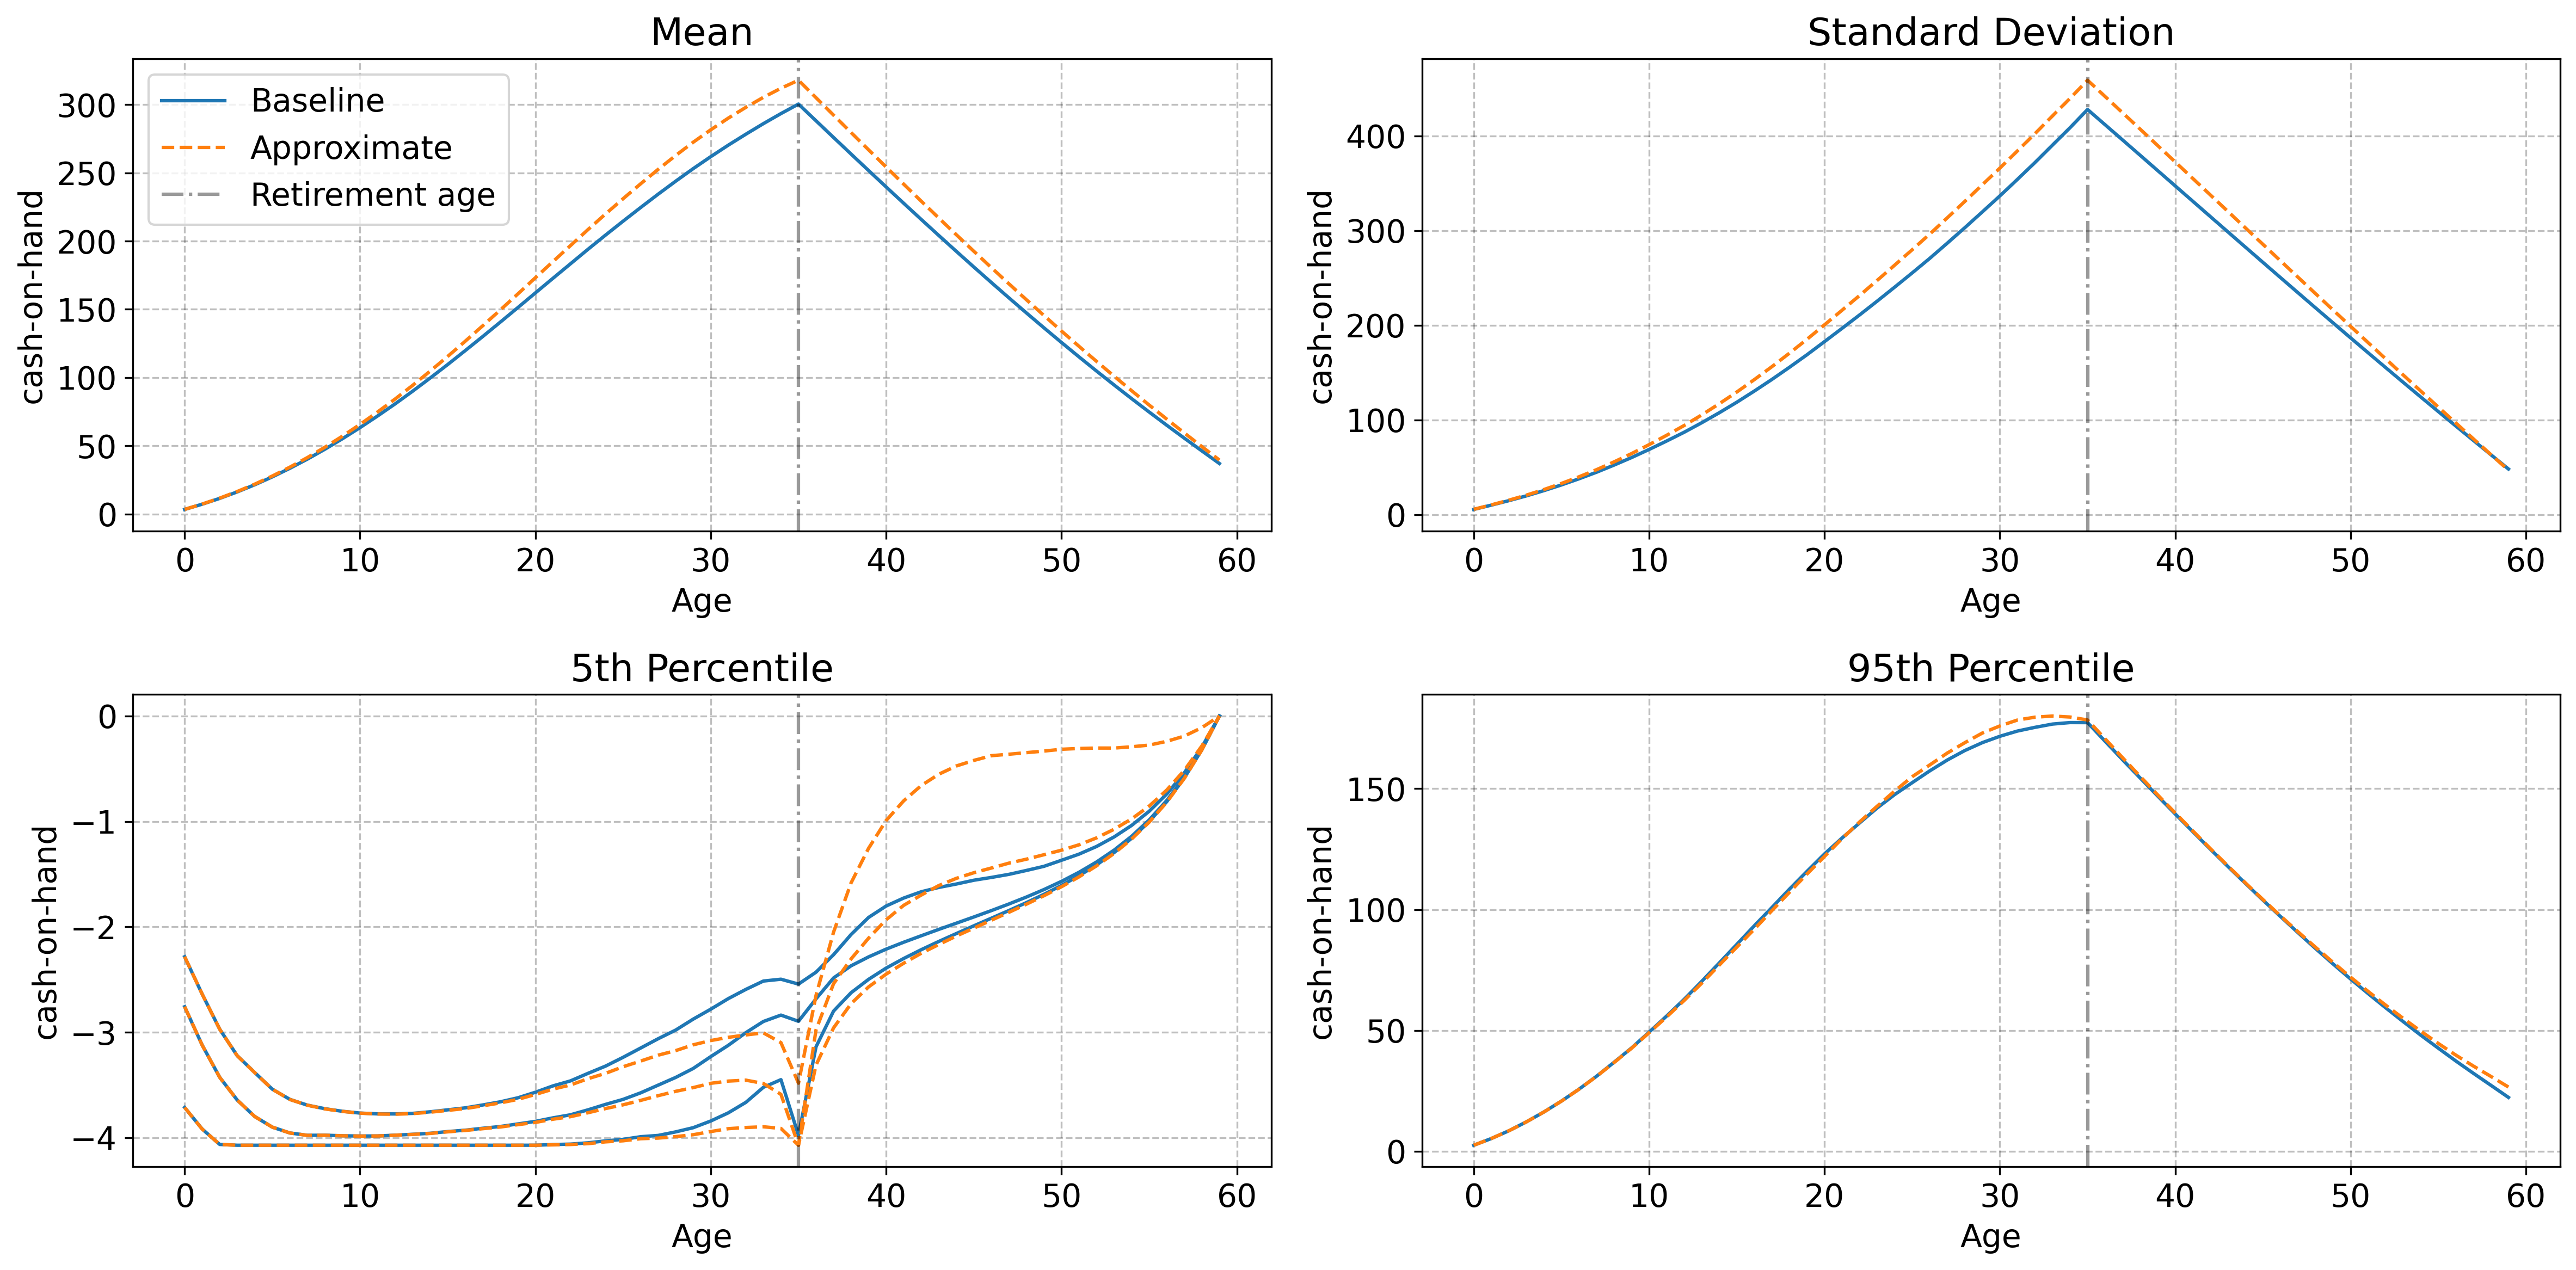

In [ ]:
# plot wide format
fig, ax = plt.subplots(2,2,figsize=(16,8),dpi=300)

model_labels = ['Baseline','Approximate']
line_type = ['-','--']
algonames_added = algonames + ['DP']


for i_model, model_name in enumerate(['base','reg']):
    # for i, algoname in enumerate(algonames):

    model = models[('DP', model_name)]
    algoname = 'DP'
    label = 'DP' + ' ' + model_labels[i_model]

    print(algoname)

    if i_model == 0:
        model_label = 'Baseline'
    else:
        model_label = 'Approximate'

    ax[0,0].plot(np.mean(model.sim.states_pd[...,0], axis=1), color=colors[i_model], linestyle=line_type[i_model],label = f'{model_label}')
    ax[0,1].plot(np.std(model.sim.states_pd[...,0], axis=1),  color=colors[i_model], linestyle=line_type[i_model])
    ax[1,0].plot(np.percentile(model.sim.states_pd[...,0],q=5, axis=1),  color=colors[i_model], linestyle=line_type[i_model])
    ax[1,0].plot(np.percentile(model.sim.states_pd[...,0],q=3, axis=1),  color=colors[i_model], linestyle=line_type[i_model])
    ax[1,0].plot(np.percentile(model.sim.states_pd[...,0],q=1, axis=1),  color=colors[i_model], linestyle=line_type[i_model])
    ax[1,1].plot(np.percentile(model.sim.states_pd[...,0],q = 50, axis=1),  color=colors[i_model], linestyle=line_type[i_model])


ax[0,0].axvline(model.par.T_retired, color='black', linestyle='-.', alpha=0.4, label = 'Retirement age')
ax[0,1].axvline(model.par.T_retired, color='black', linestyle='-.', alpha=0.4)
ax[1,0].axvline(model.par.T_retired, color='black', linestyle='-.', alpha=0.4)
ax[1,1].axvline(model.par.T_retired, color='black', linestyle='-.', alpha=0.4)

ax[0,0].set_xlabel('Age')
ax[0,0].set_ylabel('cash-on-hand')
ax[0,0].set_title('Mean')
ax[0,0].legend()
ax[0,1].set_title('Standard Deviation')
ax[0,1].set_xlabel('Age')
ax[0,1].set_ylabel('cash-on-hand')
ax[1,0].set_title('5th Percentile')
ax[1,0].set_xlabel('Age')
ax[1,0].set_ylabel('cash-on-hand')
ax[1,1].set_title('95th Percentile')
ax[1,1].set_xlabel('Age')
ax[1,1].set_ylabel('cash-on-hand')

ax[0,0].legend( loc='best')


fig.tight_layout()

fig.show()
fig.savefig(os.path.join(folder,"m_across_compare" + '.pdf'), bbox_inches='tight')

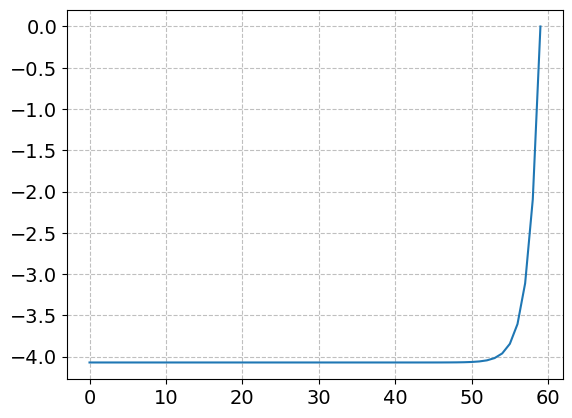

In [17]:
plt.plot(models[('DP', 'base')].par.a_low)

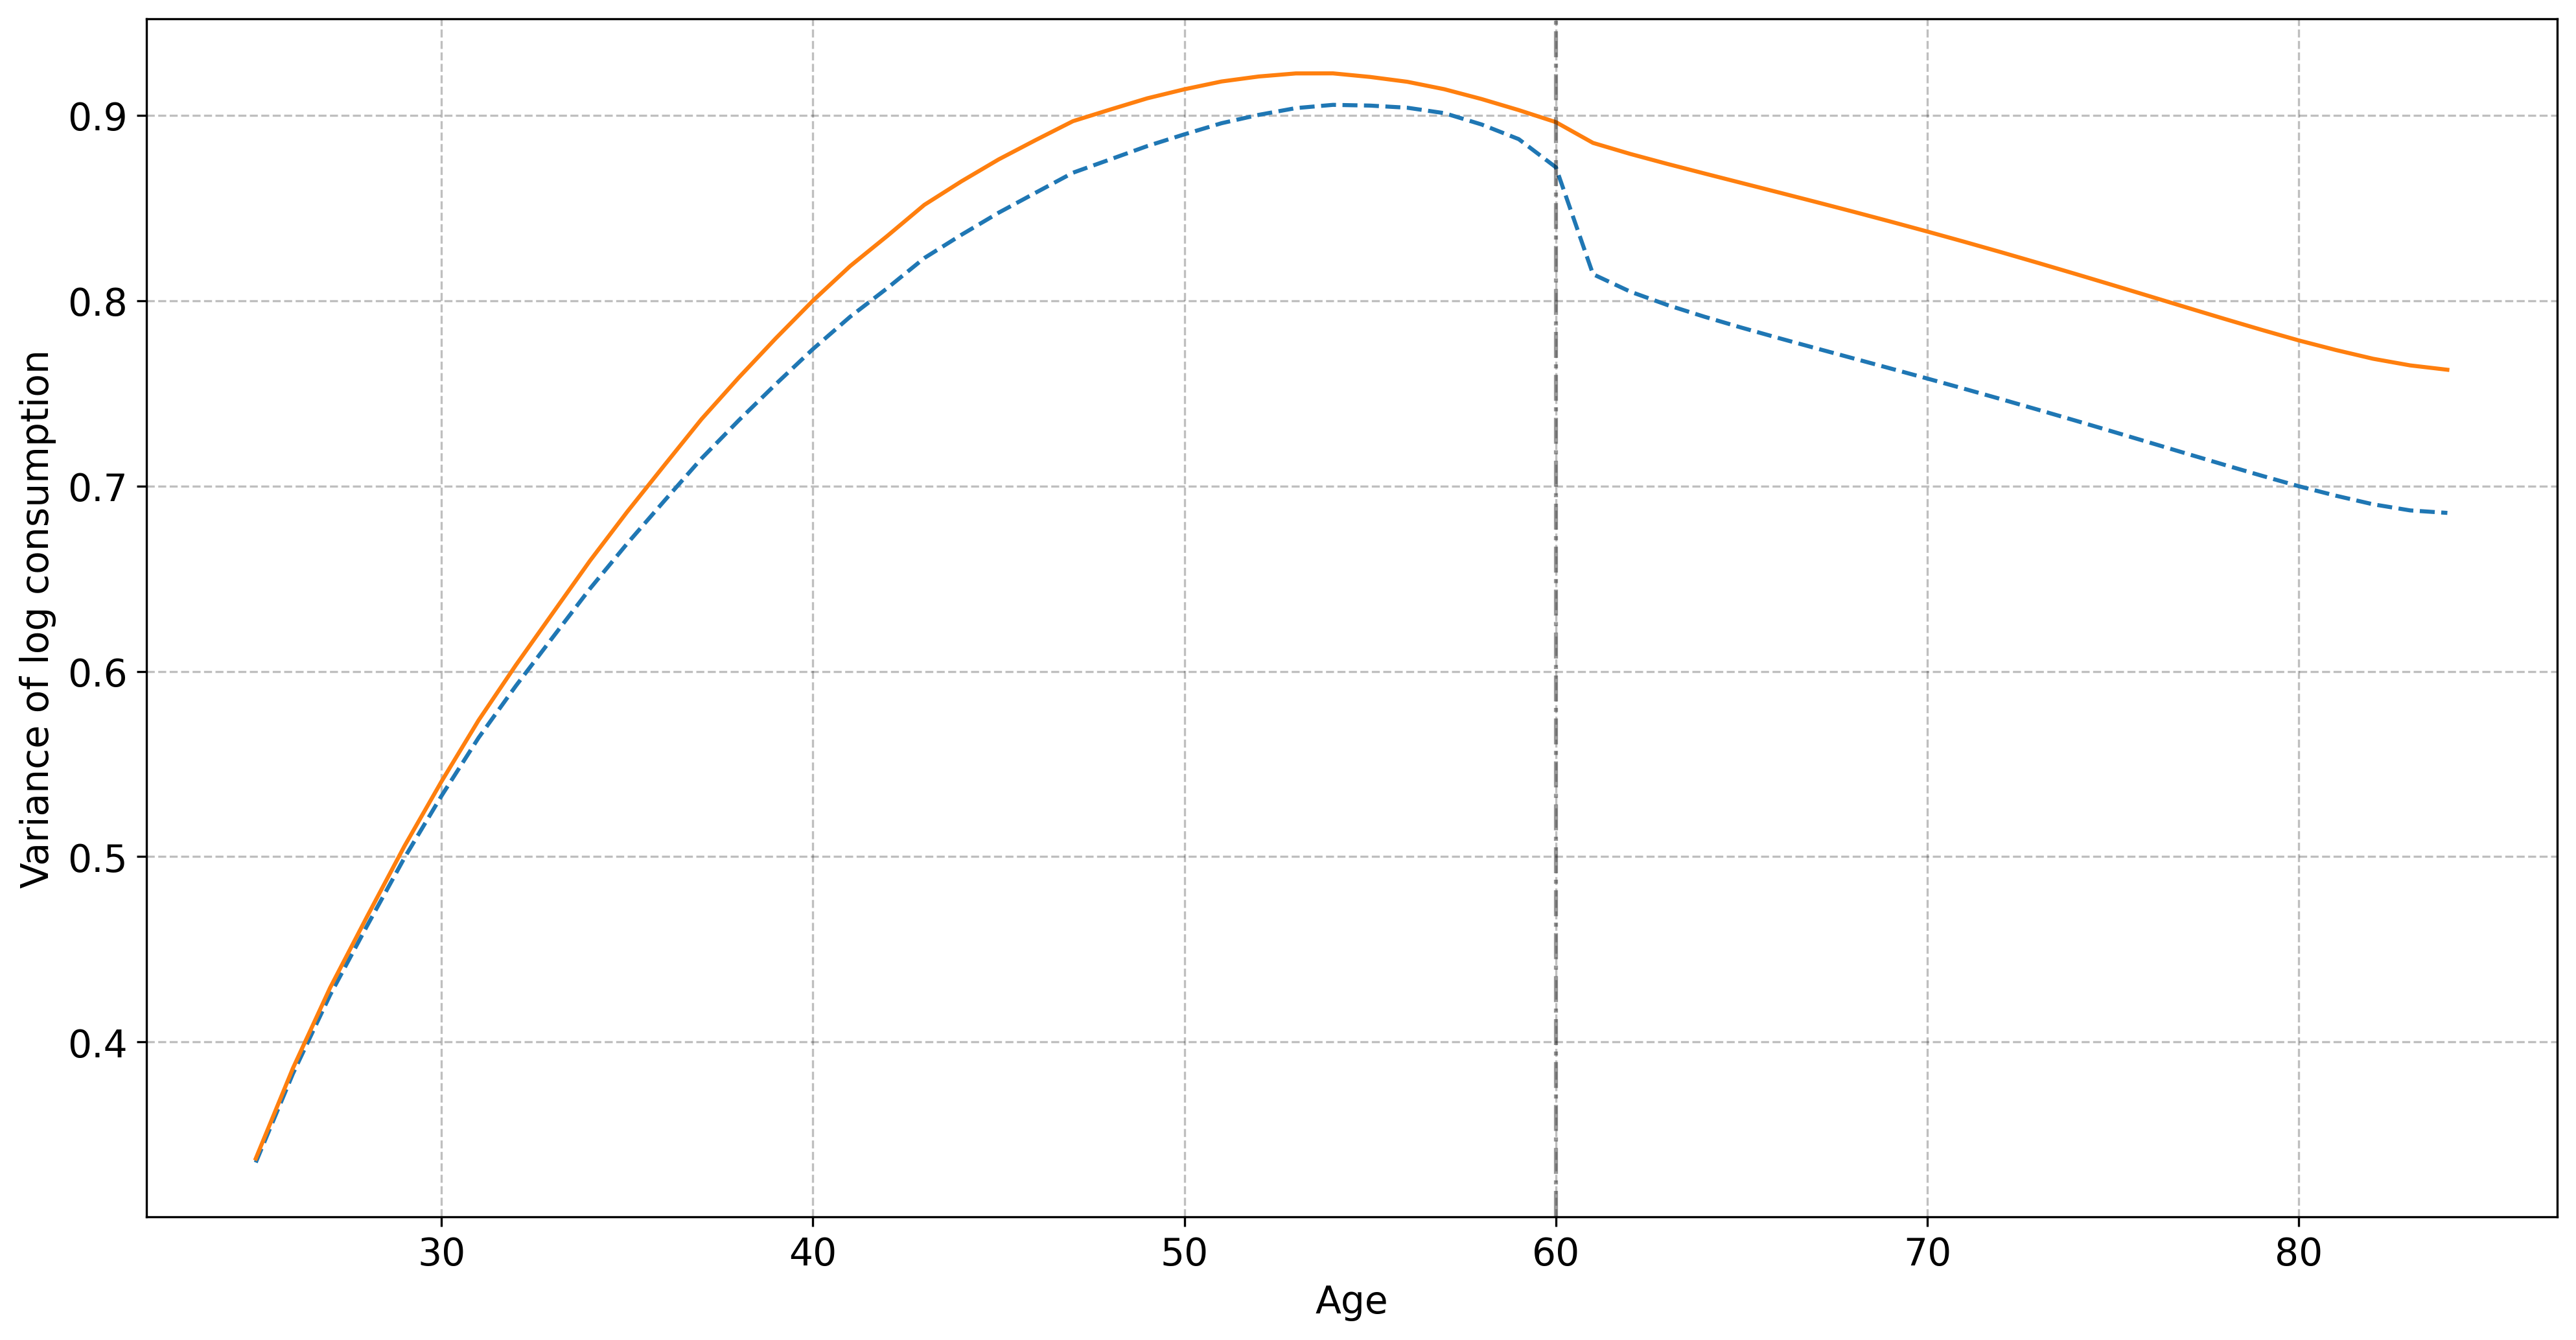

In [18]:

log_con_reg = np.log(models[('DP','reg')].sim.outcomes[...,0])
log_con_base = np.log(models[('DP','base')].sim.outcomes[...,0])


fig, ax = plt.subplots(1,1,figsize=(16,8),dpi=300)
ax.plot(age_range, np.var(log_con_reg, axis=1), color=colors[0], linestyle='--',label = 'Approximate')
ax.plot(age_range, np.var(log_con_base, axis=1), color=colors[1], linestyle='-',label = 'Baseline')

ax.set_xlabel('Age')

ax.axvline(models[('DP','reg')].par.T_retired+25, color='black', linestyle='-.', alpha=0.4, label = 'Retirement age')

ax.set_ylabel('Variance of log consumption')

fig.savefig(os.path.join(folder,"log_con_compare" + '.pdf'), bbox_inches='tight')



## 5. <a id='toc1_'></a>[Comparing DP and DL](#toc0_)

DeepSimulate
SimEGM
DP


C:\Users\jzd145\AppData\Local\Temp\ipykernel_22084\3332095161.py:60: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


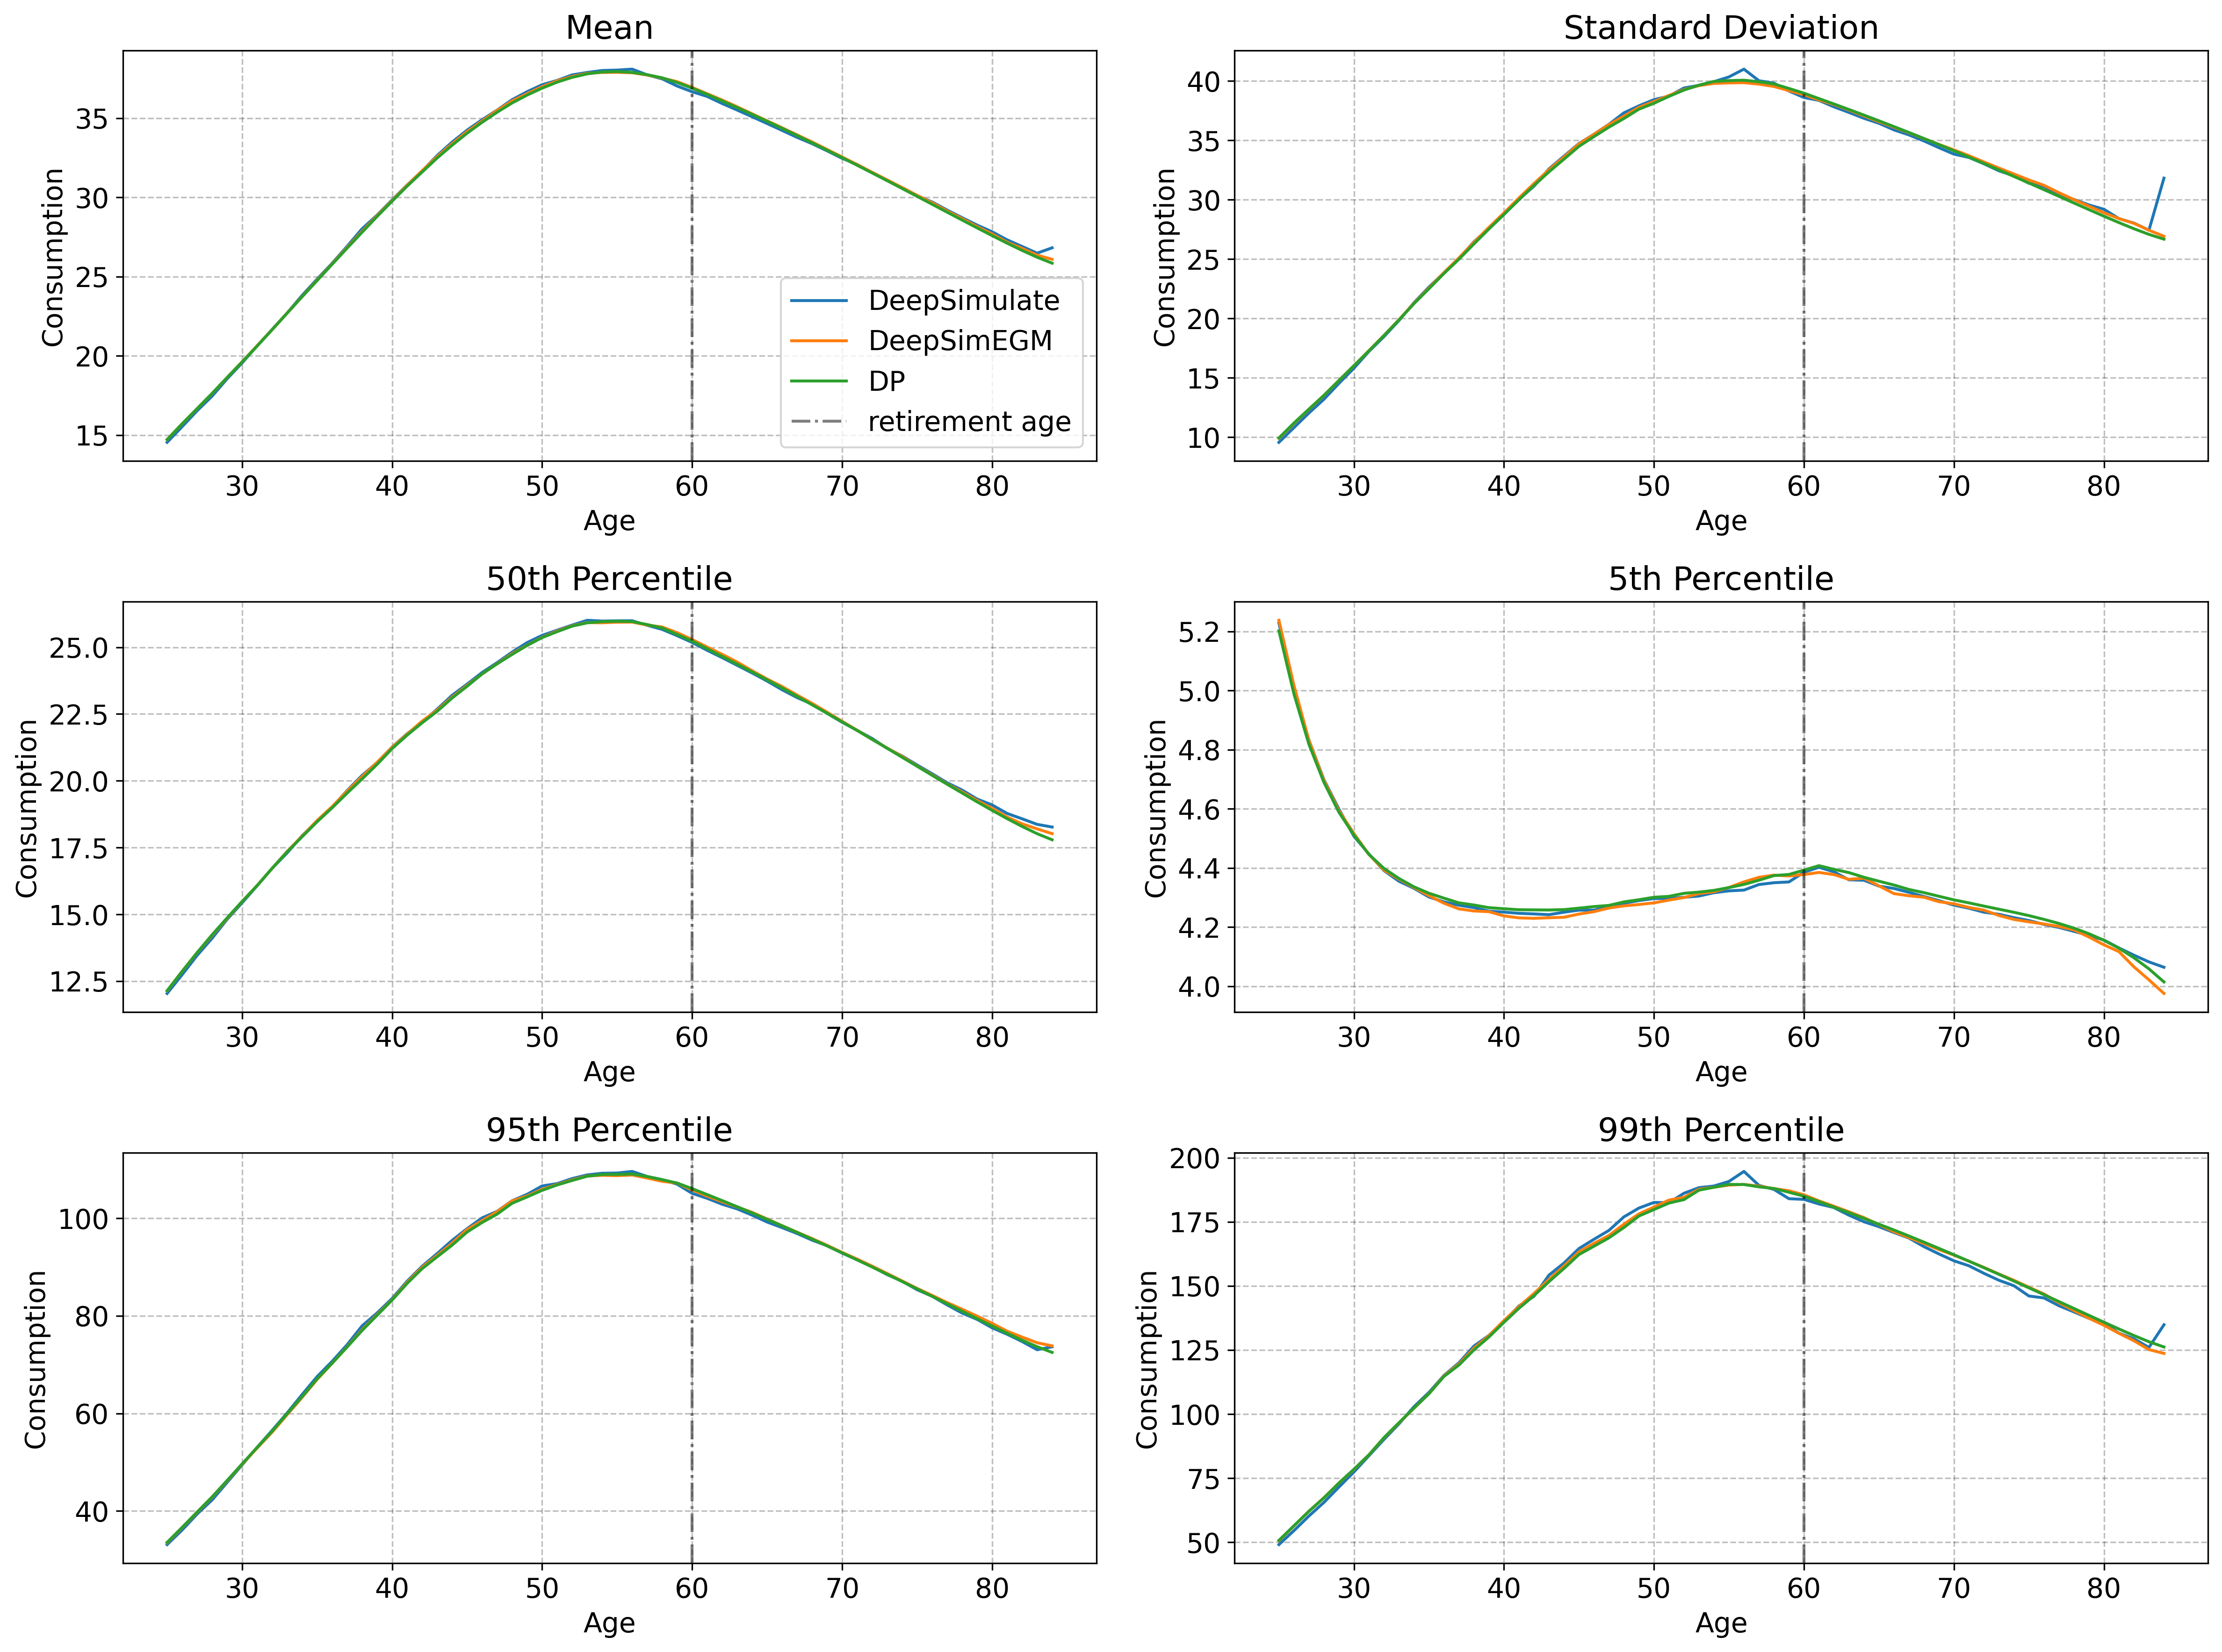

In [56]:
# plot wide format
fig, ax = plt.subplots(3,2,figsize=(16,12),dpi=300)

alpha = 0.5
for i, algoname in enumerate(algonames + ['DP']):

    model = models[(algoname, 'base')]
    if model is None: continue
    if algoname == 'DP':
        algoname = 'DP'
        label = 'DP'
        model.sim.actions[...,0] = 1 - model.sim.outcomes[...,0] / (model.sim.states[...,0] -model.par.a_low[:,None])
    else:
        label = algolabels[algoname]

    print(algoname)


    ax[0,0].plot(age_range,np.mean(model.sim.outcomes[...,0], axis=1), label =label, color=colors[i])
    ax[0,1].plot(age_range,np.std(model.sim.outcomes[...,0], axis=1), label =label, color=colors[i])
    ax[1,0].plot(age_range,np.percentile(model.sim.outcomes[...,0],q=50, axis=1), label =label, color=colors[i])
    ax[1,1].plot(age_range,np.percentile(model.sim.outcomes[...,0],q = 5, axis=1), label =label, color=colors[i])
    ax[2,0].plot(age_range,np.percentile(model.sim.outcomes[...,0],q = 95, axis=1), label =label, color=colors[i])
    ax[2,1].plot(age_range, np.percentile(model.sim.outcomes[...,0],q = 99, axis=1), label =label, color=colors[i])


    # ax[1,1].plot(age_range,np.percentile(model.sim.outcomes[...,0],q = 99.9, axis=1), label =label, color=colors[i])

ax[0,0].axvline(model.par.T_retired+25, color='black', linestyle='-.', alpha=alpha, label='retirement age')
ax[0,1].axvline(model.par.T_retired+25, color='black', linestyle='-.', alpha=alpha)
ax[1,0].axvline(model.par.T_retired+25, color='black', linestyle='-.', alpha=alpha)
ax[1,1].axvline(model.par.T_retired+25, color='black', linestyle='-.', alpha=alpha)
ax[2,0].axvline(model.par.T_retired+25, color='black', linestyle='-.', alpha=alpha)
ax[2,1].axvline(model.par.T_retired+25, color='black', linestyle='-.', alpha=alpha)
    

ax[0,0].set_xlabel('Age')
ax[0,0].set_ylabel('Consumption')
ax[0,0].set_title('Mean')
ax[0,0].legend()
ax[0,1].set_title('Standard Deviation')
ax[0,1].set_xlabel('Age')
ax[0,1].set_ylabel('Consumption')
ax[1,0].set_title('50th Percentile')
ax[1,0].set_xlabel('Age')
ax[1,0].set_ylabel('Consumption')
ax[1,1].set_title('5th Percentile')
ax[1,1].set_xlabel('Age')
ax[1,1].set_ylabel('Consumption')
ax[2,0].set_title('95th Percentile')
ax[2,0].set_xlabel('Age')
ax[2,0].set_ylabel('Consumption')
ax[2,1].set_title('99th Percentile')
ax[2,1].set_xlabel('Age')
ax[2,1].set_ylabel('Consumption')


fig.tight_layout()

fig.show()
fig.savefig(os.path.join(folder,"c_across_DL_DP_base" + '.pdf'), bbox_inches='tight')

DeepSimulate
SimEGM
DP


C:\Users\jzd145\AppData\Local\Temp\ipykernel_22084\2284690138.py:60: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


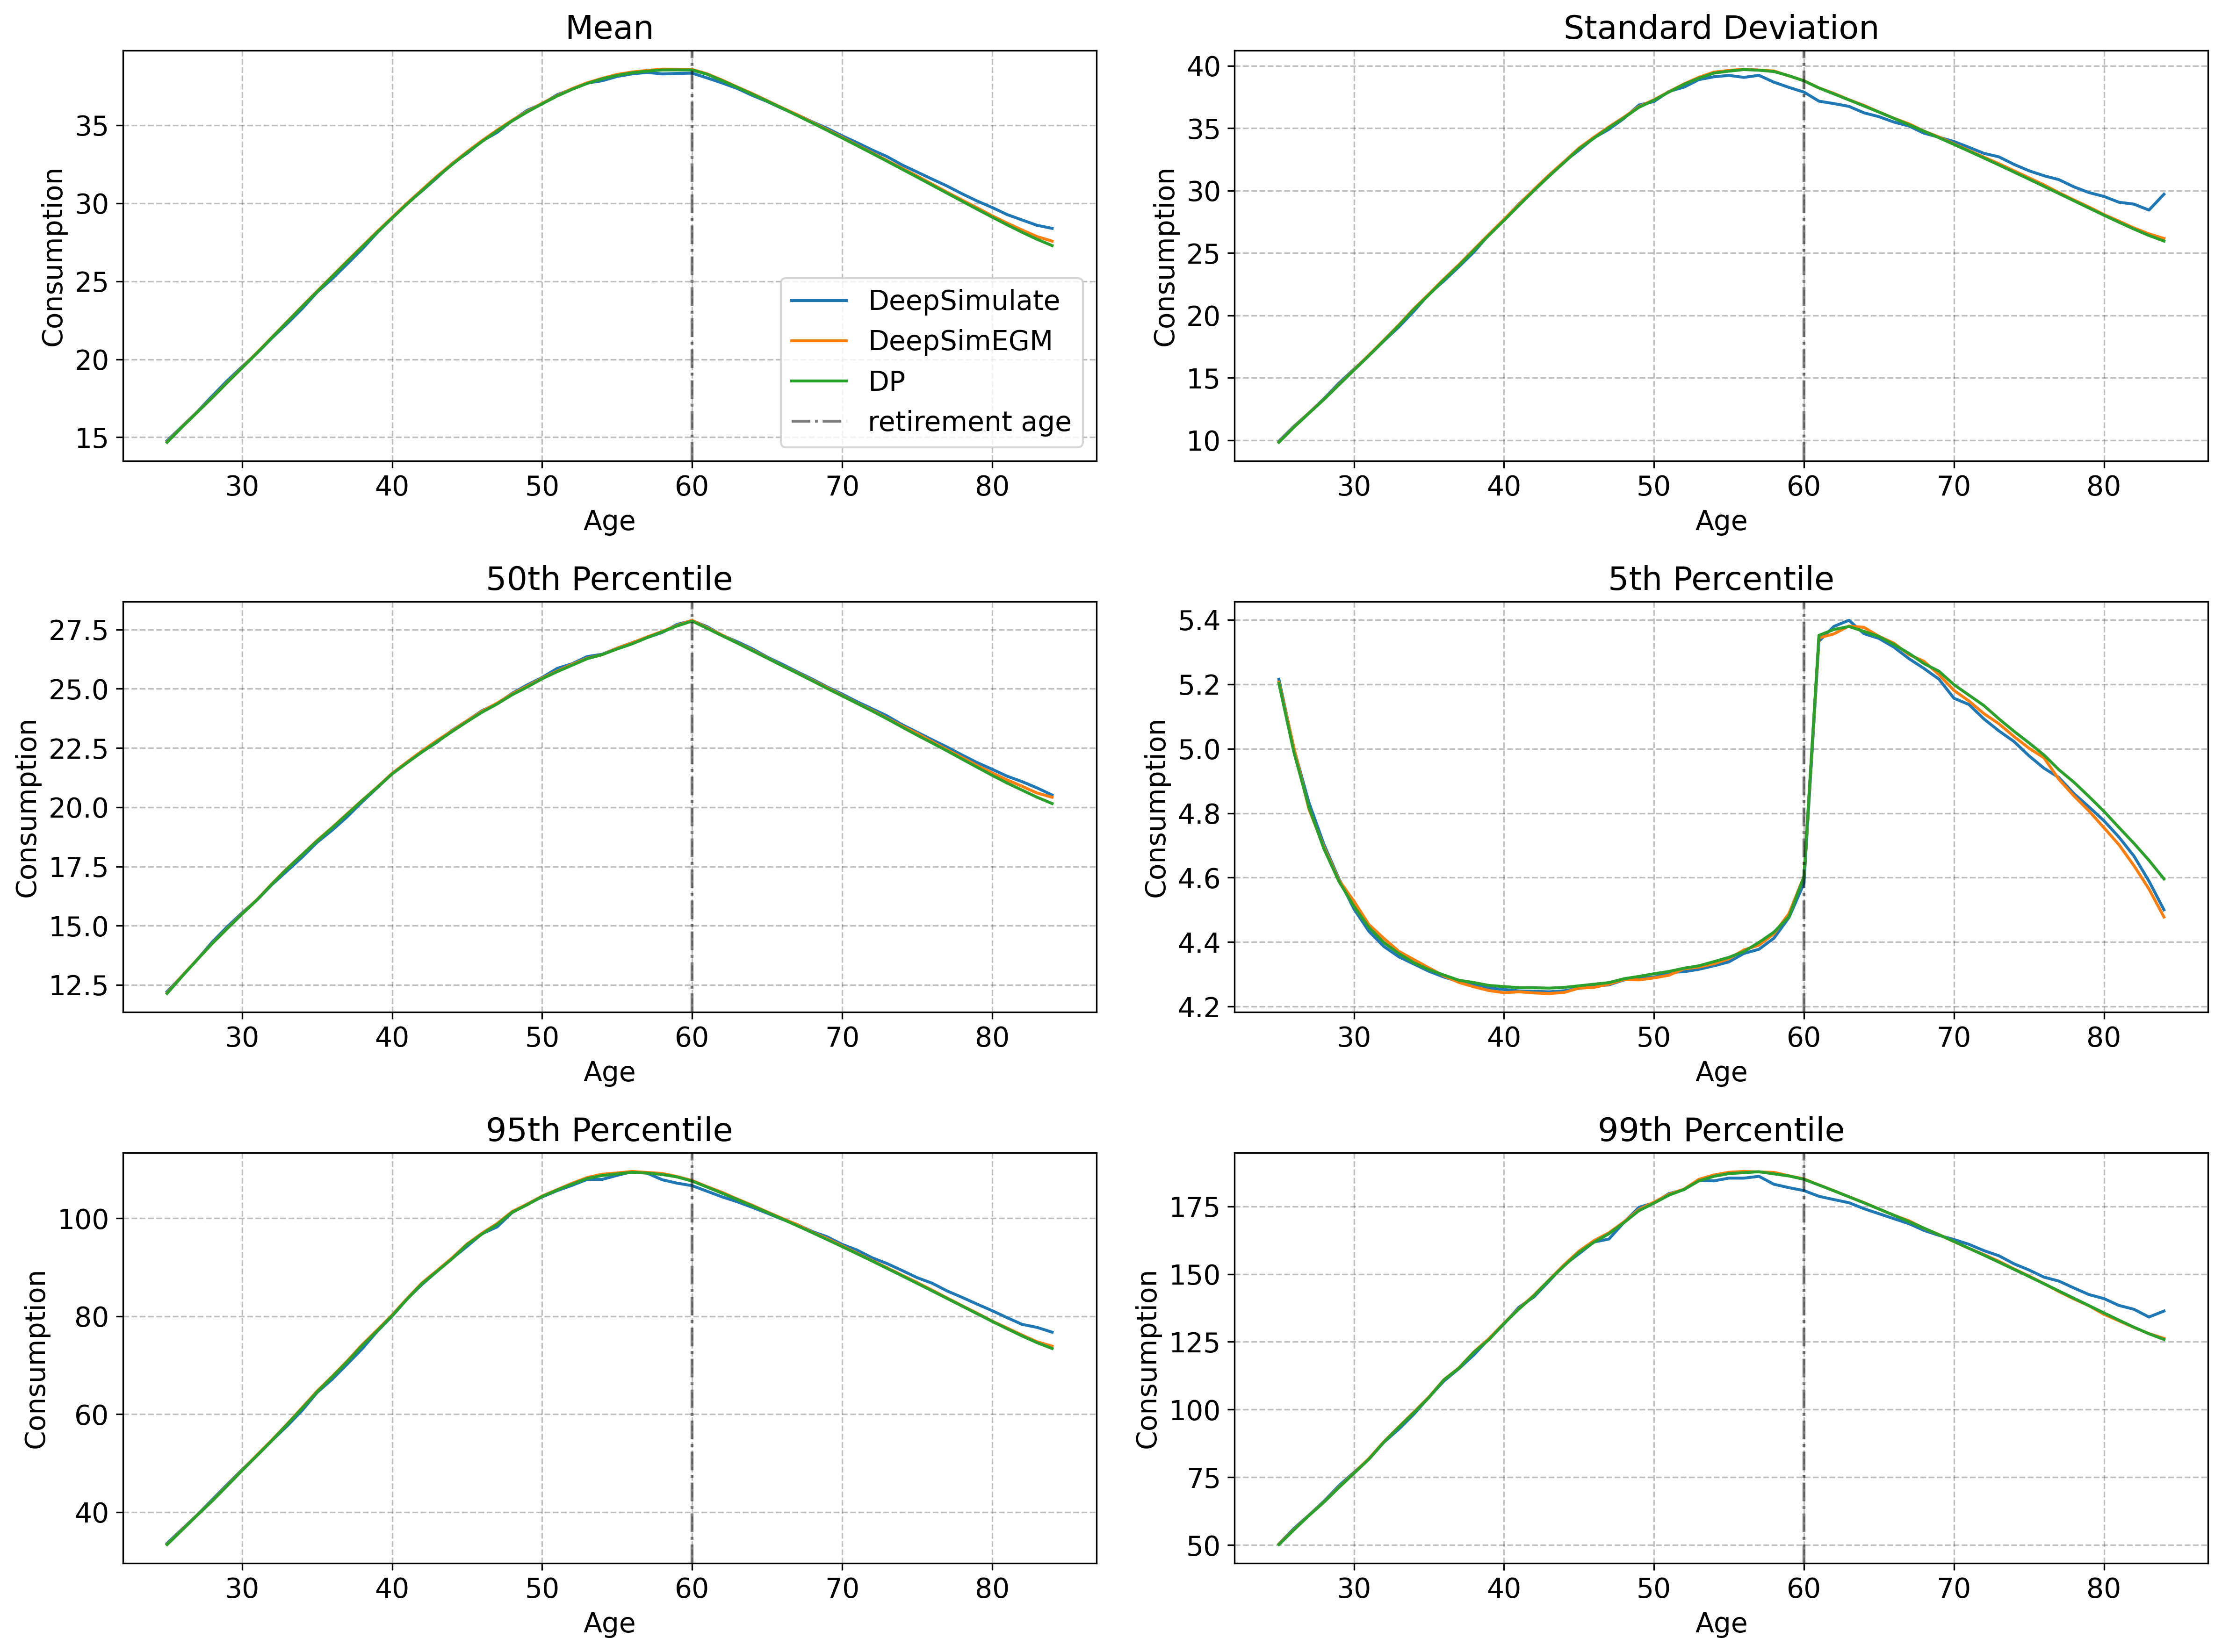

In [57]:
# plot wide format
fig, ax = plt.subplots(3,2,figsize=(16,12),dpi=300)

alpha = 0.5
for i, algoname in enumerate(algonames + ['DP']):

    model = models[(algoname, 'reg')]
    if model is None: continue
    if algoname == 'DP':
        algoname = 'DP'
        label = 'DP'
        model.sim.actions[...,0] = 1 - model.sim.outcomes[...,0] / (model.sim.states[...,0] -model.par.a_low[:,None])
    else:
        label = algolabels[algoname]

    print(algoname)


    ax[0,0].plot(age_range,np.mean(model.sim.outcomes[...,0], axis=1), label =label, color=colors[i])
    ax[0,1].plot(age_range,np.std(model.sim.outcomes[...,0], axis=1), label =label, color=colors[i])
    ax[1,0].plot(age_range,np.percentile(model.sim.outcomes[...,0],q=50, axis=1), label =label, color=colors[i])
    ax[1,1].plot(age_range,np.percentile(model.sim.outcomes[...,0],q = 5, axis=1), label =label, color=colors[i])
    ax[2,0].plot(age_range,np.percentile(model.sim.outcomes[...,0],q = 95, axis=1), label =label, color=colors[i])
    ax[2,1].plot(age_range, np.percentile(model.sim.outcomes[...,0],q = 99, axis=1), label =label, color=colors[i])


    # ax[1,1].plot(age_range,np.percentile(model.sim.outcomes[...,0],q = 99.9, axis=1), label =label, color=colors[i])

ax[0,0].axvline(model.par.T_retired+25, color='black', linestyle='-.', alpha=alpha, label='retirement age')
ax[0,1].axvline(model.par.T_retired+25, color='black', linestyle='-.', alpha=alpha)
ax[1,0].axvline(model.par.T_retired+25, color='black', linestyle='-.', alpha=alpha)
ax[1,1].axvline(model.par.T_retired+25, color='black', linestyle='-.', alpha=alpha)
ax[2,0].axvline(model.par.T_retired+25, color='black', linestyle='-.', alpha=alpha)
ax[2,1].axvline(model.par.T_retired+25, color='black', linestyle='-.', alpha=alpha)
    

ax[0,0].set_xlabel('Age')
ax[0,0].set_ylabel('Consumption')
ax[0,0].set_title('Mean')
ax[0,0].legend()
ax[0,1].set_title('Standard Deviation')
ax[0,1].set_xlabel('Age')
ax[0,1].set_ylabel('Consumption')
ax[1,0].set_title('50th Percentile')
ax[1,0].set_xlabel('Age')
ax[1,0].set_ylabel('Consumption')
ax[1,1].set_title('5th Percentile')
ax[1,1].set_xlabel('Age')
ax[1,1].set_ylabel('Consumption')
ax[2,0].set_title('95th Percentile')
ax[2,0].set_xlabel('Age')
ax[2,0].set_ylabel('Consumption')
ax[2,1].set_title('99th Percentile')
ax[2,1].set_xlabel('Age')
ax[2,1].set_ylabel('Consumption')


fig.tight_layout()

fig.show()
fig.savefig(os.path.join(folder,"c_across_DL_DP_reg" + '.pdf'), bbox_inches='tight')